# Preliminary code before answering questions

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

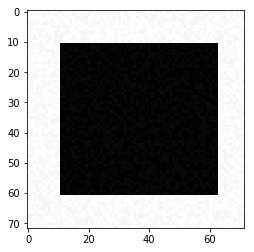

In [3]:
im = generate_a_rectangle(10, False)
plt.imshow(im.reshape(72, 72), cmap='gray')

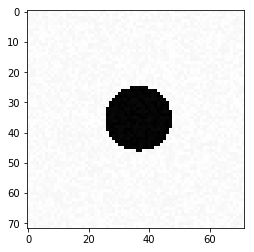

In [4]:
im = generate_a_disk(10)
plt.imshow(im.reshape(72, 72), cmap='gray')

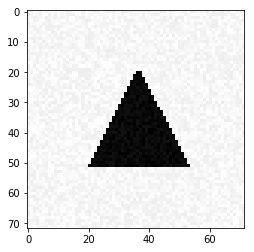

In [5]:
[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(72, 72), cmap='gray')

In [6]:
from keras.utils import np_utils

def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1:
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3)
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((72,72))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    Y_test = np_utils.to_categorical(Y_test, 3)
    return [X_test, Y_test]

/Users/Jean/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/Jean/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# Generating training data

In [7]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [8]:
# format
Y_train = np_utils.to_categorical(Y_train)

# Question 2

In [9]:
# SGD model
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

modelSGD = Sequential([
    Dense(3, input_dim=5184),
    Activation('softmax')
])

# for a multi-class classification problem
modelSGD.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#X_test = generate_a_rectangle()
#X_test = X_test.reshape(1, X_test.shape[0])

#modelSGD.predict(X_test)
modelSGD.fit(X_train, Y_train, nb_epoch=50, batch_size=32)

array([[2.6663049e-08, 1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [51]:
# Adam model
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

modelA = Sequential([
    Dense(3, input_dim=5184),
    Activation('softmax')
])

#sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

# for a multi-class classification problem
modelA.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# fit model
modelA.fit(X_train, Y_train, nb_epoch=50, batch_size=32)

/Users/Jean/anaconda3/lib/python3.6/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/50
300/300 [==============================] - 0s 1ms/step - loss: 2.3677 - acc: 0.3500
Epoch 2/50
300/300 [==============================] - 0s 161us/step - loss: 1.0147 - acc: 0.5667
Epoch 3/50
300/300 [==============================] - 0s 141us/step - loss: 0.6882 - acc: 0.7067
Epoch 4/50
300/300 [==============================] - 0s 114us/step - loss: 0.4872 - acc: 0.8100
Epoch 5/50
300/300 [==============================] - 0s 108us/step - loss: 0.3352 - acc: 0.8967
Epoch 6/50
300/300 [==============================] - 0s 109us/step - loss: 0.2924 - acc: 0.9000
Epoch 7/50
300/300 [==============================] - 0s 111us/step - loss: 0.3053 - acc: 0.8800
Epoch 8/50
300/300 [==============================] - 0s 111us/step - loss: 0.2335 - acc: 0.9400
Epoch 9/50
300/300 [==============================] - 0s 113us/step - loss: 0.2684 - acc: 0.8900
Epoch 10/50
300/300 [==============================] - 0s 273us/step - loss: 0.3051 - acc: 0.8433
Epoch 11/50
300/300 [==========

[[ 1.  0.  0.]]
[[ 0.  1.  0.]]


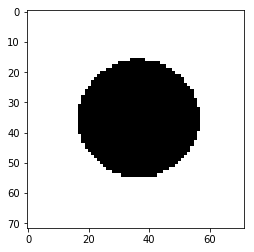

In [52]:
### Let's perform predictions on test data

# carré = 0; cercle = 1; triangle =2
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
print(modelSGD.predict(X_test)) #The model is right
print(modelA.predict(X_test)) #The model is right
plt.imshow(X_test.reshape(72, 72), cmap='gray')

[[ 1.  0.  0.]]
[[ 1.  0.  0.]]


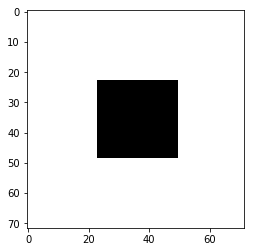

In [53]:
# carré = 0; cercle = 1; triangle =2
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
print(modelSGD.predict(X_test)) #The model is wrong
print(modelA.predict(X_test)) #The model is right
plt.imshow(X_test.reshape(72, 72), cmap='gray')

[[ 0.  0.  1.]]
[[ 0.  0.  1.]]


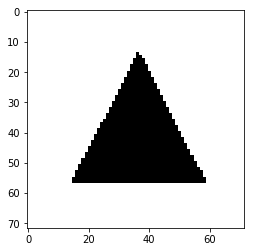

In [54]:
# carré = 0; cercle = 1; triangle =2
X_test = generate_a_triangle()
X_test = X_test[0].reshape(1, X_test[0].shape[0])
print(modelSGD.predict(X_test)) #The model is wrong
print(modelA.predict(X_test)) #The model is right
plt.imshow(X_test[0].reshape(72, 72), cmap='gray')

It seems that the Adam optimizer is much more effective in this case. This was to be expected
given the accuracy of the model on training (69%).

# Question 3

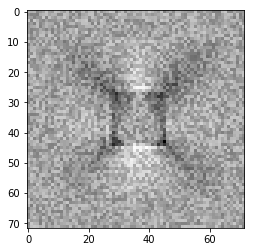

In [55]:
vis = modelA.get_weights()[0][:,0]
plt.imshow(vis.reshape(72, 72), cmap='gray')

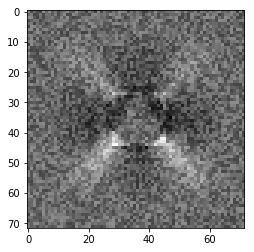

In [56]:
vis = modelA.get_weights()[0][:,1]
plt.imshow(vis.reshape(72, 72), cmap='gray')

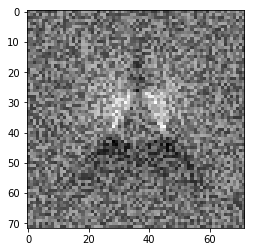

In [57]:
vis = modelA.get_weights()[0][:,2]
plt.imshow(vis.reshape(72, 72), cmap='gray')

Each of these visualizations shows each shape in the forming (not yet very distinct).